# Data Analysis and Vis, HW 5
*Adapted from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: July 11

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

In [1]:
# imports and setup 

import pandas as pd
import numpy as np
import statistics

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.  We saw these in class when we looked at clustering methods.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.1506521

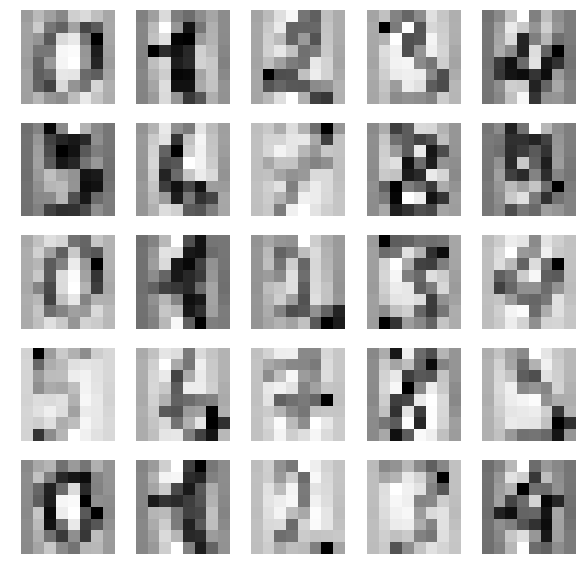

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [5]:
# build train/test and use svm.SVC with a radial basis function as the kernel
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
rbfModel = svm.SVC(kernel='rbf', C=100)
#fit the data using test dataset
rbfModel.fit(X_train,y_train)
print(rbfModel)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [6]:
rbfModel.get_params()

{'C': 100,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [7]:
#predicting y from the test data
y_pred = rbfModel.predict(X_test)
#compute the confusion matrix in order to see where the classifier is going wrong
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]
Accuracy =  0.952712100139


[16, 60, 84, 112, 169, 176, 203, 210, 225, 248, 249, 284, 298, 347, 361, 385, 387, 394, 400, 439, 462, 487, 523, 528, 533, 537, 540, 545, 576, 591, 635, 648, 683, 721, 726, 735, 738, 755, 757, 782, 785, 799, 891, 932, 957, 971, 999, 1032, 1040, 1085, 1089, 1090, 1108, 1120, 1149, 1198, 1217, 1230, 1255, 1273, 1283, 1342, 1346, 1356, 1363, 1371, 1394, 1395]


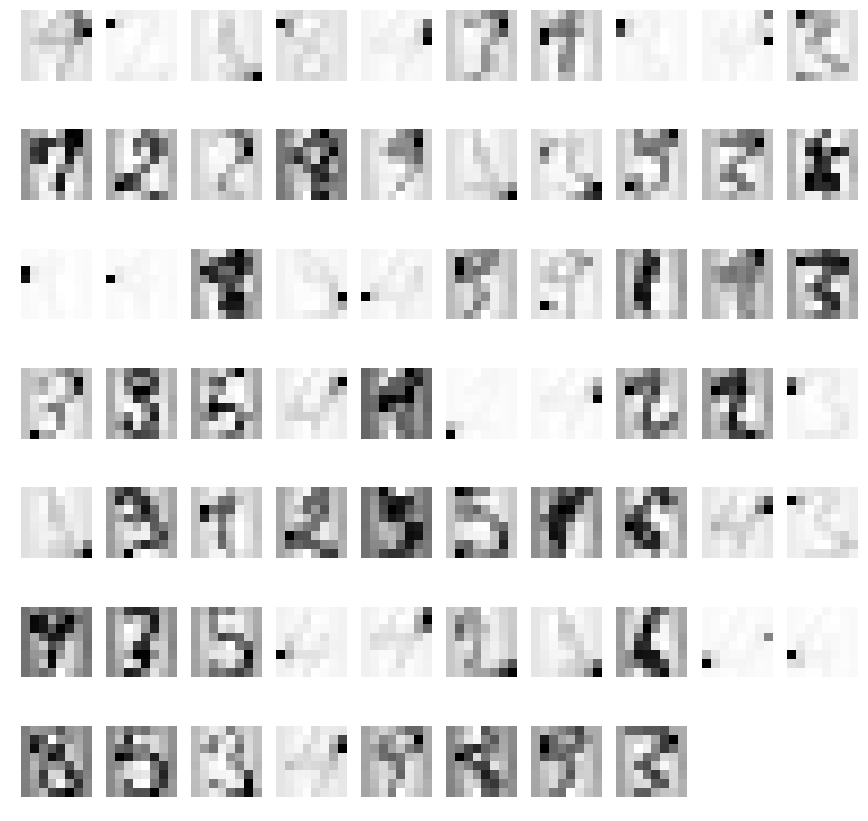

In [8]:
misClassified = [x for x in range(len(y_pred)) if y_test[x] != y_pred[x]]
print(misClassified)
plt.figure(figsize=(15,15))
for i, val in enumerate(misClassified): 
    plt.subplot(np.ceil(len(misClassified)/10), 10, i+1)
    plt.imshow(np.reshape(X_test[val,:], (8,8)), cmap='Greys', interpolation='nearest')
    plt.axis('off')
plt.show()

In [9]:
#This seems to suggest that the testing went well, but this seems odd. I'd think we should be far less accurate
for i in range (1, 500, 5): 
    model = svm.SVC(kernel='rbf', C=i).fit(X_test,y_test)
    y_predi = model.predict(X_test)
#     score = cross_val_score(estimator = model, X = X_test, y = y_test, cv=5, scoring='accuracy') 
#     print(metrics.confusion_matrix(y_true = y, y_pred=y_predi))
    print('Accuracy = ', cross_val_score(estimator = model, X = X_test, y = y_test, cv=5, scoring='accuracy'), 'C = ', i)

Accuracy =  [ 0.98287671  0.98281787  0.97552448  0.99298246  0.98239437] C =  1
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  6
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  11
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  16
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  21
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  26
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  31
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  36
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  41
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  46
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  51
Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  56
Accuracy =  [ 0.97

Accuracy =  [ 0.97945205  0.9862543   0.97202797  0.99298246  0.98591549] C =  496


In [10]:
#6 unscaled data
Xu = digits.data
yu = digits.target
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(Xu, yu, random_state=1, test_size=0.8)
for i in range (1, 500, 5): 
    model_u = svm.SVC(kernel='rbf', C=i).fit(X_test_u,y_test_u)
    y_pred_u = model.predict(Xu)
#     score = cross_val_score(estimator = model, X = X_test, y = y_test, cv=5, scoring='accuracy') 
#     print(metrics.confusion_matrix(y_true = y, y_pred=y_predi))
    print('Accuracy = ', cross_val_score(estimator = model_u, X = X_test_u, y = y_test_u, cv=5, scoring='accuracy'), 'C = ', i)

Accuracy =  [ 0.42123288  0.49484536  0.42307692  0.41052632  0.39084507] C =  1
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  6
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  11
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  16
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  21
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  26
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  31
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  36
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  41
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  46
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  51
Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  56
Accuracy =  [ 0.48

Accuracy =  [ 0.48287671  0.53608247  0.47552448  0.44210526  0.44014085] C =  496


**Your Interpretation**: The best value for Accuracy was .962159154457986. This was the case for all values for C from 2 - 500. The worst value was for C = 1. This suggests that no matter the value of C, the result is the same. 



### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

In [11]:
# your solution goes here

knnModel = KNeighborsClassifier(n_neighbors=10).fit(X_train,y_train)
y_pre = knnModel.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pre))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pre))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.912378303199


[16, 60, 84, 112, 169, 176, 203, 210, 225, 248, 249, 284, 298, 347, 361, 385, 387, 394, 400, 439, 462, 487, 523, 528, 533, 537, 540, 545, 576, 591, 635, 648, 683, 721, 726, 735, 738, 755, 757, 782, 785, 799, 891, 932, 957, 971, 999, 1032, 1040, 1085, 1089, 1090, 1108, 1120, 1149, 1198, 1217, 1230, 1255, 1273, 1283, 1342, 1346, 1356, 1363, 1371, 1394, 1395]


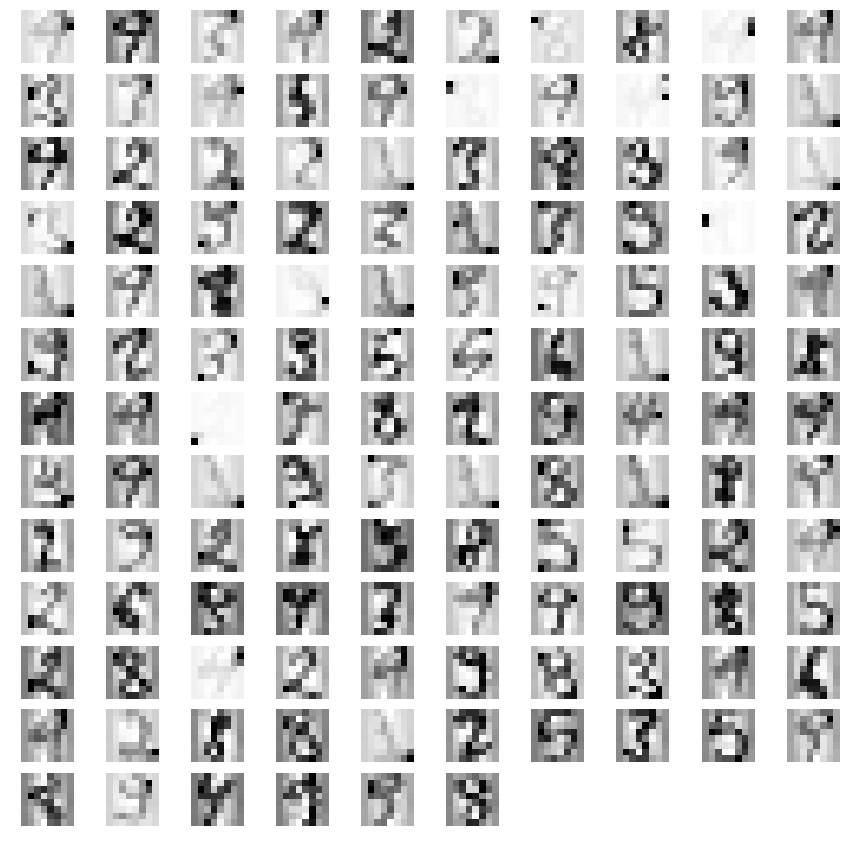

In [12]:
misClassifiedK = [x for x in range(len(y_pre)) if y_test[x] != y_pre[x]]
print(misClassified)
plt.figure(figsize=(15,15))
for i, val in enumerate(misClassifiedK): 
    plt.subplot(np.ceil(len(misClassifiedK)/10), 10, i+1)
    plt.imshow(np.reshape(X_test[val,:], (8,8)), cmap='Greys', interpolation='nearest')
    plt.axis('off')
plt.show()

Best =  9.08163265306


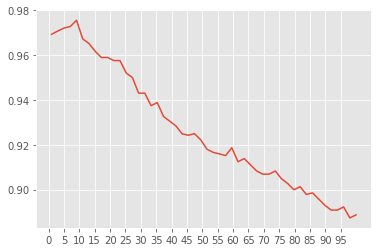

In [13]:

Cs = np.linspace(1, 100, 50)
Accuracies = np.zeros(Cs.shape[0])
for i,k in enumerate(Cs): 
    mod = KNeighborsClassifier(n_neighbors=int(k))
#     print(metrics.confusion_matrix(y_true = y_train, y_pred=y_prediction))
    scores = cross_val_score(estimator = mod, X = X_test, y = y_test, cv=5, scoring='accuracy')
    Accuracies[i] = scores.mean()
plt.plot(Cs,Accuracies)
plt.xticks(np.arange(0, 100, 5))
best = Cs[np.argmax(Accuracies)]
print('Best = ', best)
plt.show()

Best =  1.0


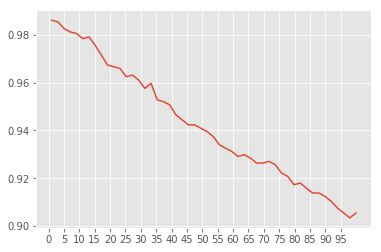

In [14]:
# Xu = digits.data
# yu = digits.target
# X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(Xu, yu, random_state=1, test_size=0.8)
kuCs = np.linspace(1, 100, 50)
kuAccuracies = np.zeros(kuCs.shape[0])
for i,k in enumerate(kuCs): 
    mod_ku = KNeighborsClassifier(n_neighbors=int(k))
#     print(metrics.confusion_matrix(y_true = y_train, y_pred=y_prediction))
    scores = cross_val_score(estimator = mod_ku, X = X_test_u, y = y_test_u, cv=5, scoring='accuracy')
    kuAccuracies[i] = scores.mean()
plt.plot(kuCs,kuAccuracies)
plt.xticks(np.arange(0, 100, 5))
kubest = kuCs[np.argmax(kuAccuracies)]
print('Best = ', kubest)
plt.show()

**Your Interpretation**: Looks like the best K for this dataset was around 3. 

# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [15]:
# Your code here.  Note the data and description are in the OnlineNewsPopularity directory
dirtyCsv = pd.read_csv("/Users/znickle/znickle/DataAnalysesAndVisualization/Homework/Homework5/OnlineNewsPopularity/OnlineNewsPopularity.csv")
list(dirtyCsv)
#the following are the instructions above (create np array called shares, delete url and timedelta then create the remaining colums as an np array)
del dirtyCsv['url']
del dirtyCsv[' timedelta']
shares = dirtyCsv[' shares']
shares = shares.as_matrix()
del dirtyCsv[' shares']
SX = dirtyCsv.as_matrix()
shares.dtype

dtype('int64')

In [16]:
#Create a binary numpy array, y, which indicates whether or not each article is popular
def isPopular(x, popValue): 
    if x >= popValue:
        return 1
    else:
        return 0
print(shares)
originalShares = shares.copy()
print(originalShares)
popularThreshold = statistics.median(shares)
print('Popular Threshold: ', popularThreshold)
for i in range(0, len(shares)):
    shares[i] = isPopular(shares[i], popularThreshold)
print(shares)
print(originalShares)

[ 593  711 1500 ..., 1900 1100 1300]
[ 593  711 1500 ..., 1900 1100 1300]
Popular Threshold:  1400.0
[0 0 1 ..., 1 0 0]
[ 593  711 1500 ..., 1900 1100 1300]


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [17]:
minimum = originalShares.min()
median = statistics.median(originalShares)
maximum = originalShares.max()
print('Minimum: ', minimum)
print('Maximum: ', maximum)
print('Median: ', median)

Minimum:  1
Maximum:  843300
Median:  1400.0


In [18]:
print(shares)

[0 0 1 ..., 1 0 0]


### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

In [19]:
SX = scale(SX)
sy = shares
print(type(SX))

sn_samples, sn_features = SX.shape
sn_digits = len(np.unique(sy))
print("sn_digits: %d, sn_samples %d, sn_features %d" % (sn_digits, sn_samples, sn_features))

<class 'numpy.ndarray'>
sn_digits: 2, sn_samples 39644, sn_features 58


In [20]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(SX, sy, random_state=1, test_size=0.8)
sModel = KNeighborsClassifier(n_neighbors=10).fit(X_train_s,y_train_s)
y_s_pre = sModel.predict(X_test_s)
print(metrics.confusion_matrix(y_true = y_test_s, y_pred = y_s_pre))
print('Accuracy = ', metrics.accuracy_score(y_true = y_test_s, y_pred = y_s_pre))

[[10052  4671]
 [ 7901  9092]]
Accuracy =  0.603607012234


Best =  100.0


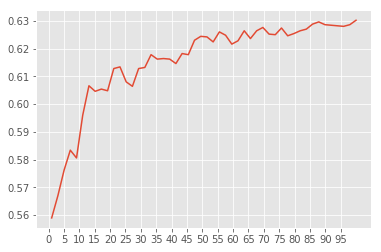

In [21]:
xCopy = SX[0:5000]
yCopy = sy[0:5000]
kss = np.linspace(1, 100, 50)
sAccuracies = np.zeros(kss.shape[0])
for i,k in enumerate(kss): 
    s_mod = KNeighborsClassifier(n_neighbors=int(k))
#     print(metrics.confusion_matrix(y_true = y_train, y_pred=y_prediction))
    scores_s = cross_val_score(estimator = s_mod, X = xCopy, y = yCopy, cv=5, scoring='accuracy')
    sAccuracies[i] = scores_s.mean()
plt.plot(kss,sAccuracies)
plt.xticks(np.arange(0, 100, 5))
sBest = kss[np.argmax(sAccuracies)]
print('Best = ', sBest)
plt.show()

**Interpretation:** Best accuracy score for knn is 93.9387755102

### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Best =  0.3


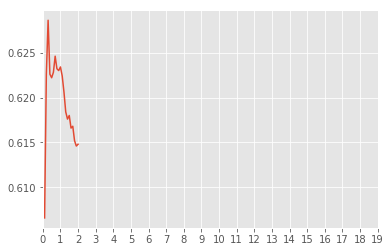

In [22]:
#use xCopy and yCopy in order to only use 5,000 articles /X_train_s, X_test_s, y_train_s, y_test_s for test/train

# for i in range (1, 500, 5): 
#     s_model = svm.SVC(kernel='rbf', C=i).fit(X_test_s,y_test_s)
#     y_predi = s_model.predict(X_test_s)
# #     score = cross_val_score(estimator = model, X = X_test, y = y_test, cv=5, scoring='accuracy') 
# #     print(metrics.confusion_matrix(y_true = y, y_pred=y_predi))
#     print('Accuracy = ', cross_val_score(estimator = model, X = X_test_s, y = y_test_s, cv=5, scoring='accuracy'), 'C = ', i)
svm_s = np.linspace(.1, 2.0,20)
sv_Accuracies = np.zeros(svm_s.shape[0])
for i,C in enumerate(svm_s): 
    sv_model = svm.SVC(kernel='rbf', C=C)
#     print(metrics.confusion_matrix(y_true = y_train, y_pred=y_prediction))
    sv_scores = cross_val_score(estimator = sv_model, X = xCopy, y = yCopy, cv=5, scoring='accuracy')
    sv_Accuracies[i] = sv_scores.mean()
    print(i)
plt.plot(svm_s,sv_Accuracies)
plt.xticks(np.arange(0, 20, 1))
sv_best = svm_s[np.argmax(sv_Accuracies)]
print('Best = ', sv_best)
plt.show()

*Best value for C is .1*

### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [23]:
# Your code here
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(SX, sy, random_state=1, test_size=0.8)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(X_train_d, y_train_d)

In [24]:
y_predict_train = decisionTree.predict(X_train_d)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train_d, y_pred = y_predict_train))
y_predict_d = decisionTree.predict(X_test_d)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test_d, y_pred = y_predict_d))

Accuracy on training data=  1.0
Accuracy on test data=  0.571919535881


In [25]:
md = [1, 3, 5, 7, 9]
mss = [15, 30, 50, 75, 100]
bestSD = [0,0]
bestScoreSoFar = 0
for x in md:
    for y in mss:
        decisionTree = tree.DecisionTreeClassifier(max_depth=x, min_samples_split=y)
#         decisionTree = decisionTree.fit(X_train_d, y_train_d)
        scores_d = cross_val_score(estimator = decisionTree, X = X_train_d, y = y_train_d, cv = 5, scoring='accuracy')
        meanScore_d = scores_d.mean()
        if meanScore_d > bestScoreSoFar: 
            bestScoreSoFar = meanScore_d
            bestSD = [x, y]
print(bestScoreSoFar)
print('Max Depth ', bestSD[0])
print('Min Sample Split ', bestSD[1])


0.629415131632
Max Depth  7
Min Sample Split  100


### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** 
1. KNN at appx 93%
2. Small k seemed to be the worst for knn. C doesn't seem to affect anything with SVM's. The depth of the decision tree does matter, choosing that is just trial and error. It seems that 7 was the best depth and 100 was the best min sample size (similar to deciding a leaf node in a quad tree). 
3. KNN because it's easy to use a graph to show where the best value for k is and easy to show the accuracy at that k. 
4. We've narrowed it down to knn for the 2nd dataset. We'd want to then go in and turn some of the nobs to tune the algorithm. All we've done here is decided which datastructure to use. 